In [358]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from scipy.stats import zscore

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [359]:
df = pd.read_csv('data/gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


# Data Pre-Processing

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

## Data Cleaning
#### Missing Values
 - There are no missing values found in this dataset.

In [361]:
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

#### Outlier Detection and Handling
- We will be using Z-score to handle outliers

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [363]:
categorical_features = [
    'Workout_Type',
    'Gender'
]
z_scores = zscore(df.drop(columns=categorical_features,axis=1))
df_filtered = df[(abs(z_scores) < 3.5).all(axis=1)]
df_filtered


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


## Note
Before Data Transformation, we might split the data into training and testing sets.

In [364]:
X = df_filtered.drop(columns=['Fat_Percentage'], axis=1)
y = df_filtered['Fat_Percentage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((776, 14), (195, 14), (776,), (195,))

## Data Transformation
#### Converting Categorical Features to Numerical Featues

- For Gender, which is a binary feature, we can either use dummy encoding or label encoding, which will give us the same results.
    - Male = 1
    - Female = 0
- For Workout_Type, we might use One Hot Encoding

In [365]:
X_train_transformed = X_train.copy(deep=True)
X_train_transformed['Gender'] = X_train_transformed['Gender'].map({'Female': 0, 'Male': 1})
X_train_transformed

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
865,21,1,101.2,1.84,181,132,50,1.30,944.0,Yoga,3.3,2,1,29.89
192,19,0,65.2,1.52,188,130,71,1.23,800.0,Cardio,2.4,3,1,28.22
309,23,0,59.0,1.78,185,141,58,1.67,1177.0,Yoga,2.7,5,3,18.62
477,51,0,66.2,1.58,164,129,65,0.86,499.0,HIIT,2.3,3,1,26.52
896,22,0,61.8,1.52,169,166,61,1.83,1519.0,Yoga,2.7,5,3,26.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,41,1,71.7,1.96,162,168,51,0.51,424.0,Yoga,2.5,2,1,18.66
270,19,0,58.8,1.77,181,136,53,1.40,952.0,HIIT,2.7,2,1,18.77
861,19,0,46.8,1.63,184,128,63,1.35,864.0,HIIT,1.6,4,2,17.61
435,51,0,56.3,1.50,182,142,66,1.43,914.0,Cardio,2.4,3,1,25.02


In [366]:
X_train_transformed['Workout_Type'].value_counts()

Workout_Type
Strength    210
Cardio      204
Yoga        189
HIIT        173
Name: count, dtype: int64

In [367]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
workout_encoded = encoder.fit_transform(X_train_transformed[['Workout_Type']])

# 3. Convert Encoded Data into a DataFrame
workout_encoded_df = pd.DataFrame(
    workout_encoded,
    columns=encoder.get_feature_names_out(['Workout_Type']),  # Get proper column names
    index=X_train_transformed.index # Keep the same index
)

# 4. Concatenate Encoded Data Back to Original DataFrame
X_train_transformed2 = pd.concat([X_train_transformed.drop('Workout_Type', axis=1), workout_encoded_df], axis=1)
X_train_transformed2

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
865,21,1,101.2,1.84,181,132,50,1.30,944.0,3.3,2,1,29.89,0.0,0.0,0.0,1.0
192,19,0,65.2,1.52,188,130,71,1.23,800.0,2.4,3,1,28.22,1.0,0.0,0.0,0.0
309,23,0,59.0,1.78,185,141,58,1.67,1177.0,2.7,5,3,18.62,0.0,0.0,0.0,1.0
477,51,0,66.2,1.58,164,129,65,0.86,499.0,2.3,3,1,26.52,0.0,1.0,0.0,0.0
896,22,0,61.8,1.52,169,166,61,1.83,1519.0,2.7,5,3,26.75,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,41,1,71.7,1.96,162,168,51,0.51,424.0,2.5,2,1,18.66,0.0,0.0,0.0,1.0
270,19,0,58.8,1.77,181,136,53,1.40,952.0,2.7,2,1,18.77,0.0,1.0,0.0,0.0
861,19,0,46.8,1.63,184,128,63,1.35,864.0,1.6,4,2,17.61,0.0,1.0,0.0,0.0
435,51,0,56.3,1.50,182,142,66,1.43,914.0,2.4,3,1,25.02,1.0,0.0,0.0,0.0


In [368]:
# Transform the test data
X_test_transformed = X_test.copy(deep=True)
X_test_transformed['Gender'] = X_test_transformed['Gender'].map({'Female': 0, 'Male': 1})
test_encodings = encoder.transform(X_test_transformed[['Workout_Type']])
test_encodings_df = pd.DataFrame(
    test_encodings,
    columns=encoder.get_feature_names_out(['Workout_Type']),
    index=X_test_transformed.index
)
X_test_transformed2 = pd.concat([X_test_transformed.drop('Workout_Type', axis=1), test_encodings_df], axis=1)
X_test_transformed2

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
168,54,0,72.3,1.78,163,149,72,1.27,852.0,1.8,2,1,22.82,1.0,0.0,0.0,0.0
836,23,0,65.2,1.62,192,156,59,1.37,1069.0,2.5,3,2,24.84,1.0,0.0,0.0,0.0
76,42,0,53.7,1.72,183,142,74,1.37,875.0,1.6,3,1,18.15,1.0,0.0,0.0,0.0
70,57,0,64.0,1.52,170,129,52,1.73,1004.0,2.7,5,3,27.70,0.0,0.0,1.0,0.0
88,28,1,81.6,1.66,174,153,50,1.09,917.0,3.5,4,2,29.61,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,20,1,55.0,1.60,172,168,67,1.12,1035.0,3.2,4,2,21.48,0.0,0.0,0.0,1.0
633,53,1,68.5,1.97,194,139,69,1.30,894.0,2.1,3,2,17.65,0.0,1.0,0.0,0.0
557,22,1,86.2,1.90,186,128,58,1.91,1345.0,3.5,5,3,23.88,0.0,0.0,1.0,0.0
33,24,0,58.9,1.51,187,157,68,1.04,816.0,2.5,2,1,25.83,1.0,0.0,0.0,0.0


In [369]:
joblib.dump(encoder, 'model/workout_type_encoder.pkl')

['model/workout_type_encoder.pkl']

#### Scaling/Normalization
- For Scaling the data, we will be using MinMax Scaler in scikit learn package

In [370]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed2)
X_train_transformed_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train_transformed2.columns,  # Preserve column names
    index=X_train_transformed2.index       # Preserve index
)

X_train_transformed_scaled.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
865,0.073171,1.0,0.680756,0.68,0.538462,0.244898,0.000000,0.533333,0.426913,0.818182,0.000000,0.0,0.506924,0.0,0.0,0.0,1.0
192,0.024390,0.0,0.280311,0.04,0.717949,0.204082,0.875000,0.486667,0.328552,0.409091,0.333333,0.0,0.458742,1.0,0.0,0.0,0.0
309,0.121951,0.0,0.211346,0.56,0.641026,0.428571,0.333333,0.780000,0.586066,0.545455,1.000000,1.0,0.181766,0.0,0.0,0.0,1.0
477,0.804878,0.0,0.291435,0.16,0.102564,0.183673,0.625000,0.240000,0.122951,0.363636,0.333333,0.0,0.409694,0.0,1.0,0.0,0.0
896,0.097561,0.0,0.242492,0.04,0.230769,0.938776,0.458333,0.886667,0.819672,0.545455,1.000000,1.0,0.416330,0.0,0.0,0.0,1.0


In [371]:
X_test_scaled = scaler.transform(X_test_transformed2)
X_test_transformed_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test_transformed2.columns,   # Preserve column names
    index=X_test_transformed2.index        # Preserve index
)
X_test_transformed_scaled.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
168,0.878049,0.0,0.359288,0.56,0.076923,0.591837,0.916667,0.513333,0.364071,0.136364,0.000000,0.0,0.302943,1.0,0.0,0.0,0.0
836,0.121951,0.0,0.280311,0.24,0.820513,0.734694,0.375000,0.580000,0.512295,0.454545,0.333333,0.5,0.361223,1.0,0.0,0.0,0.0
76,0.585366,0.0,0.152392,0.44,0.589744,0.448980,1.000000,0.580000,0.379781,0.045455,0.333333,0.0,0.168205,1.0,0.0,0.0,0.0
70,0.951220,0.0,0.266963,0.04,0.256410,0.183673,0.083333,0.820000,0.467896,0.545455,1.000000,1.0,0.443739,0.0,0.0,1.0,0.0
88,0.243902,1.0,0.462736,0.32,0.358974,0.673469,0.000000,0.393333,0.408470,0.909091,0.666667,0.5,0.498846,0.0,0.0,0.0,1.0


In [372]:
joblib.dump(scaler, 'model/minmax_scaler.pkl')

['model/minmax_scaler.pkl']

## Feature Selection
#### Checking the correlation between different features

<Axes: >

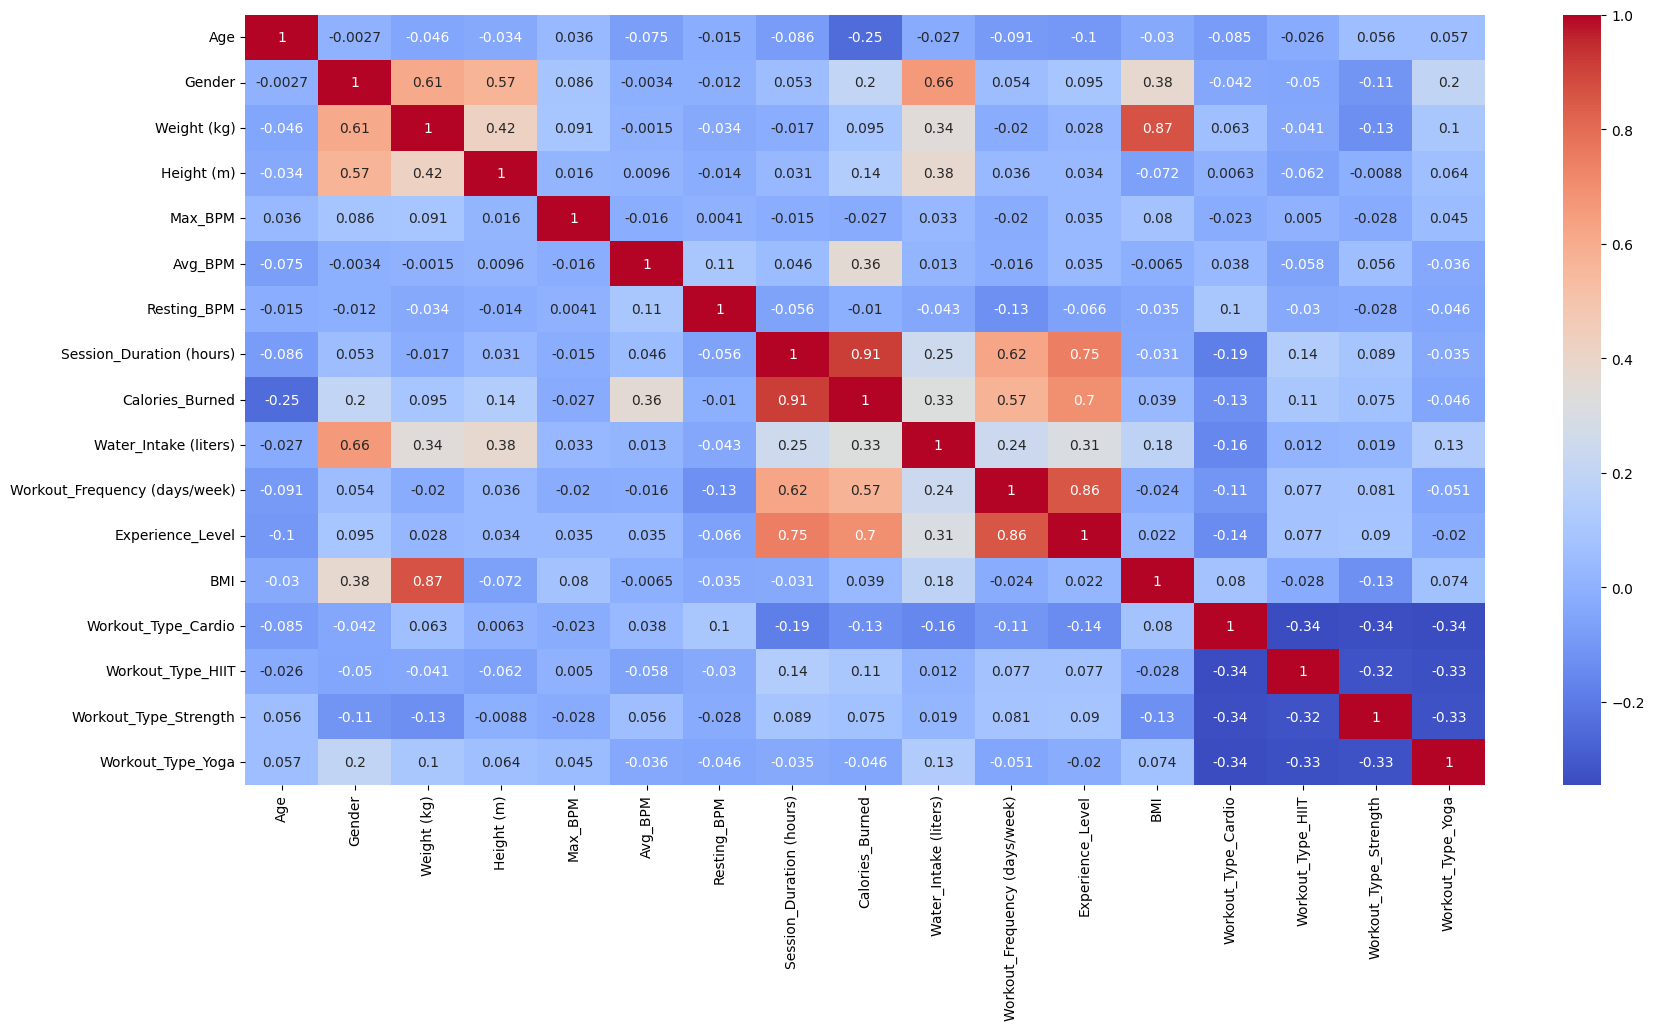

In [373]:
plt.figure(figsize=(20, 10))
sns.heatmap(X_test_transformed_scaled.corr(), annot=True, cmap='coolwarm')

Based on the analysis of this correlation matrix, We will drop the following features:
+ Session_Duration (hours)
+ Workout_Frequency (days/week)

In [374]:
# Drop the specified features from training and testing datasets
features_to_drop = ['Session_Duration (hours)', 'Workout_Frequency (days/week)']

X_train_final = X_train_transformed_scaled.drop(columns=features_to_drop, axis=1)
X_test_final = X_test_transformed_scaled.drop(columns=features_to_drop, axis=1)

# Verify the changes
print("Training dataset shape after dropping features:", X_train_final.shape)
print("Testing dataset shape after dropping features:", X_test_final.shape)

Training dataset shape after dropping features: (776, 15)
Testing dataset shape after dropping features: (195, 15)


In [375]:
X_train_final.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Calories_Burned,Water_Intake (liters),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
865,0.073171,1.0,0.680756,0.68,0.538462,0.244898,0.000000,0.426913,0.818182,0.0,0.506924,0.0,0.0,0.0,1.0
192,0.024390,0.0,0.280311,0.04,0.717949,0.204082,0.875000,0.328552,0.409091,0.0,0.458742,1.0,0.0,0.0,0.0
309,0.121951,0.0,0.211346,0.56,0.641026,0.428571,0.333333,0.586066,0.545455,1.0,0.181766,0.0,0.0,0.0,1.0
477,0.804878,0.0,0.291435,0.16,0.102564,0.183673,0.625000,0.122951,0.363636,0.0,0.409694,0.0,1.0,0.0,0.0
896,0.097561,0.0,0.242492,0.04,0.230769,0.938776,0.458333,0.819672,0.545455,1.0,0.416330,0.0,0.0,0.0,1.0


In [376]:
X_test_final.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Calories_Burned,Water_Intake (liters),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
168,0.878049,0.0,0.359288,0.56,0.076923,0.591837,0.916667,0.364071,0.136364,0.0,0.302943,1.0,0.0,0.0,0.0
836,0.121951,0.0,0.280311,0.24,0.820513,0.734694,0.375000,0.512295,0.454545,0.5,0.361223,1.0,0.0,0.0,0.0
76,0.585366,0.0,0.152392,0.44,0.589744,0.448980,1.000000,0.379781,0.045455,0.0,0.168205,1.0,0.0,0.0,0.0
70,0.951220,0.0,0.266963,0.04,0.256410,0.183673,0.083333,0.467896,0.545455,1.0,0.443739,0.0,0.0,1.0,0.0
88,0.243902,1.0,0.462736,0.32,0.358974,0.673469,0.000000,0.408470,0.909091,0.5,0.498846,0.0,0.0,0.0,1.0


# Model Fitting
### Linear Regression Model

In [377]:
class ResultMetrics:
    def __init__(self, model, y_true, y_pred):
        self.model = model
        self.mse = mean_squared_error(y_true, y_pred)
        self.mae = mean_absolute_error(y_true, y_pred)
        self.r2 = r2_score(y_true, y_pred)

In [378]:
# Initialize the Linear Regression model
models = {
    'KNN' : KNeighborsRegressor(),
    'LinearRegression' : LinearRegression(),
    'RandomForest' : RandomForestRegressor()
}
test_results = {}
train_results = {}
best_score = 0
best_model = None
for name,model in models.items():
    # Fit the model to the training data
    model.fit(X_train_final, y_train)

    # Make predictions on the training set
    y_train_pred = model.predict(X_train_final)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test_final)

    # Evaluate the model performance
    train_result = ResultMetrics(name, y_train, y_train_pred)
    test_result = ResultMetrics(name, y_test, y_test_pred)
    train_results[name] = train_result
    test_results[name] = test_result
    
    if test_result.r2 > best_score:
        best_score = test_result.r2
        best_model = (name,model)
    print(name,test_result.r2)



KNN 0.734580444591002
LinearRegression 0.6117645100754843
RandomForest 0.776557273877883


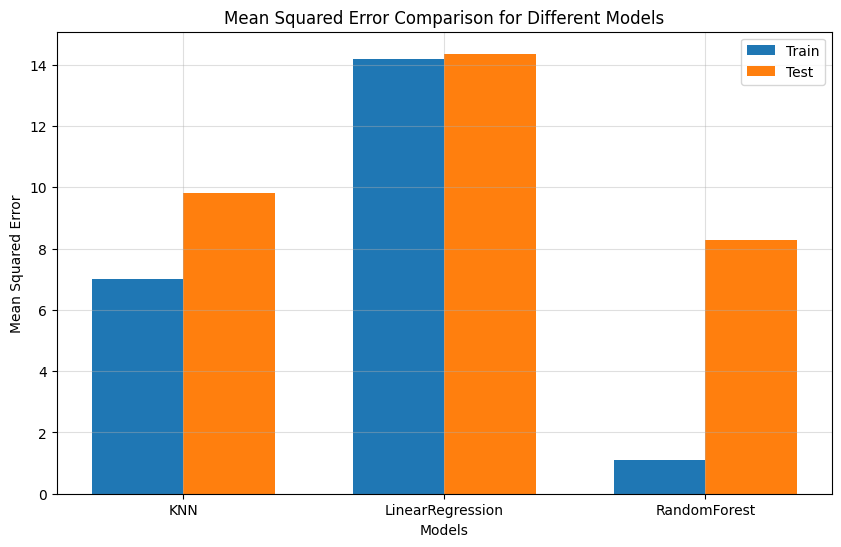

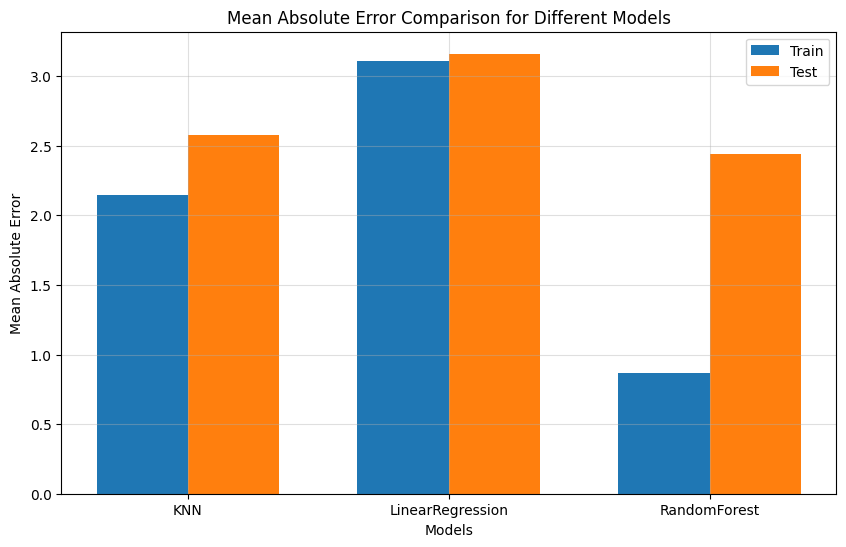

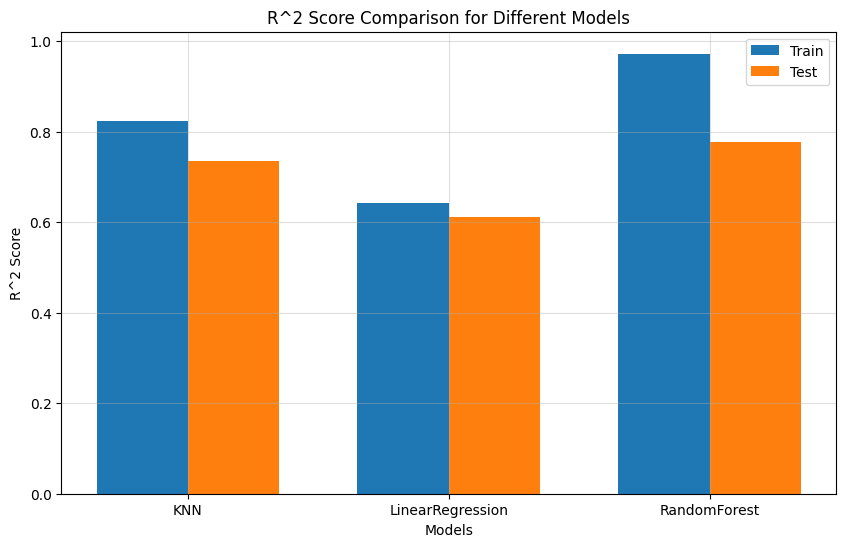

In [379]:
def plot_comparison_metrics(train_results, test_results):
    metrics = ['mse', 'mae', 'r2']
    metric_names = ['Mean Squared Error', 'Mean Absolute Error', 'R^2 Score']
    
    for metric, metric_name in zip(metrics, metric_names):
        plt.figure(figsize=(10, 6))
        
        train_metric_values = [getattr(train_results[model], metric) for model in train_results]
        test_metric_values = [getattr(test_results[model], metric) for model in test_results]
        
        x = np.arange(len(train_results))
        width = 0.35
        
        plt.bar(x - width/2, train_metric_values, width, label='Train')
        plt.bar(x + width/2, test_metric_values, width, label='Test')
        
        plt.xlabel('Models')
        plt.ylabel(metric_name)
        plt.title(f'{metric_name} Comparison for Different Models')
        plt.xticks(x, train_results.keys())
        plt.legend()
        plt.grid(alpha=0.4)
        plt.show()

# Call the function to plot the comparison metrics
plot_comparison_metrics(train_results, test_results)

On analyzing the test and training r2_score of our Random forest, we realize that it is overfitting and not generalizing as well on the test dataset. Therefore, we will prefer the second best, which is KNN Regressor 

In [380]:
best_model = ('KNN',models['KNN'])
print('\n')
print(f"Best Model: {best_model[0]}")
# Print evaluation metrics
print(f"Training Set Performance:")
print(f"- Mean Squared Error: {train_results[best_model[0]].mse:.3f}")
print(f"- Mean Absolute Error: {train_results[best_model[0]].mae:.3f}")
print(f"- R^2 Score: {train_results[best_model[0]].r2:.3f}")
print("\nTesting Set Performance:")
print(f"- Mean Squared Error: {test_results[best_model[0]].mse:.3f}")
print(f"- Mean Absolute Error: {test_results[best_model[0]].mae:.3f}")
print(f"- R^2 Score: {test_results[best_model[0]].r2:.3f}")

joblib.dump(best_model[1], 'model/best_model.pkl')



Best Model: KNN
Training Set Performance:
- Mean Squared Error: 6.998
- Mean Absolute Error: 2.149
- R^2 Score: 0.824

Testing Set Performance:
- Mean Squared Error: 9.818
- Mean Absolute Error: 2.576
- R^2 Score: 0.735


['model/best_model.pkl']

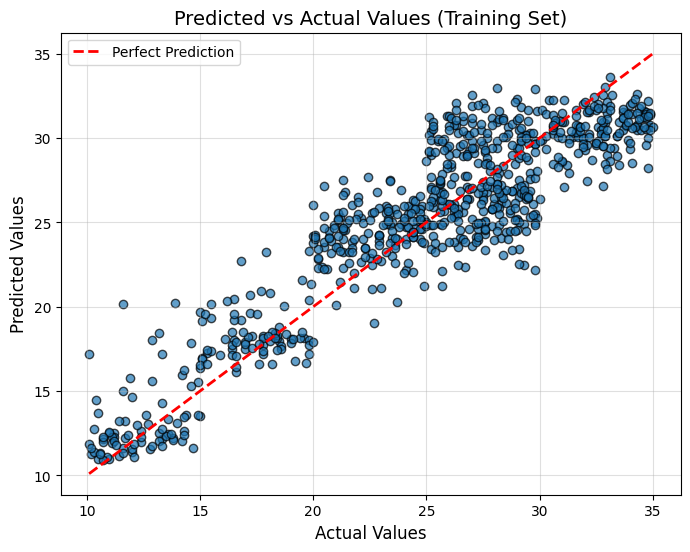

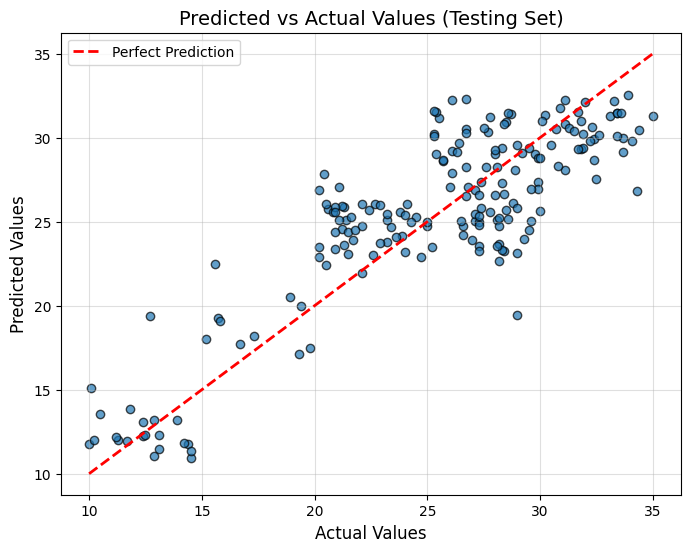

In [381]:
def plot_results(y_true, y_pred, dataset_type):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, edgecolor='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect Prediction')
    plt.title(f"Predicted vs Actual Values ({dataset_type} Set)", fontsize=14)
    plt.xlabel("Actual Values", fontsize=12)
    plt.ylabel("Predicted Values", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.4)
    plt.show()

y_train_pred = best_model[1].predict(X_train_final)
y_test_pred = best_model[1].predict(X_test_final)
# Plot for training set
plot_results(y_train, y_train_pred, "Training")

# Plot for testing set
plot_results(y_test, y_test_pred, "Testing")

In [382]:
def test(X_test):
    X_test = X_test.copy()
    model = joblib.load('model/best_model.pkl')
    encoder = joblib.load('model/workout_type_encoder.pkl')
    scaler = joblib.load('model/minmax_scaler.pkl')

    X_test['Gender'] = X_test['Gender'].map({'Female': 0, 'Male': 1})
    test_encodings = encoder.transform(X_test[['Workout_Type']])
    test_encodings_df = pd.DataFrame(
        test_encodings,
        columns=encoder.get_feature_names_out(['Workout_Type']),
        index=X_test.index
    )
    X_test = pd.concat([X_test.drop('Workout_Type', axis=1), test_encodings_df], axis=1)
    
    X_test_scaled = scaler.transform(X_test)
    X_test = pd.DataFrame(
        X_test_scaled,
        columns=X_test.columns,   # Preserve column names
        index=X_test.index        # Preserve index
    )
    features_to_drop = ['Session_Duration (hours)', 'Workout_Frequency (days/week)']
    X_test = X_test.drop(columns=features_to_drop, axis=1)

    y_pred = model.predict(X_test)
    return y_pred
    

In [383]:
X_test

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
168,54,Female,72.3,1.78,163,149,72,1.27,852.0,Cardio,1.8,2,1,22.82
836,23,Female,65.2,1.62,192,156,59,1.37,1069.0,Cardio,2.5,3,2,24.84
76,42,Female,53.7,1.72,183,142,74,1.37,875.0,Cardio,1.6,3,1,18.15
70,57,Female,64.0,1.52,170,129,52,1.73,1004.0,Strength,2.7,5,3,27.70
88,28,Male,81.6,1.66,174,153,50,1.09,917.0,Yoga,3.5,4,2,29.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,20,Male,55.0,1.60,172,168,67,1.12,1035.0,Yoga,3.2,4,2,21.48
633,53,Male,68.5,1.97,194,139,69,1.30,894.0,HIIT,2.1,3,2,17.65
557,22,Male,86.2,1.90,186,128,58,1.91,1345.0,Strength,3.5,5,3,23.88
33,24,Female,58.9,1.51,187,157,68,1.04,816.0,Cardio,2.5,2,1,25.83


In [384]:
X_test.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [385]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 168 to 31
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            195 non-null    int64  
 1   Gender                         195 non-null    object 
 2   Weight (kg)                    195 non-null    float64
 3   Height (m)                     195 non-null    float64
 4   Max_BPM                        195 non-null    int64  
 5   Avg_BPM                        195 non-null    int64  
 6   Resting_BPM                    195 non-null    int64  
 7   Session_Duration (hours)       195 non-null    float64
 8   Calories_Burned                195 non-null    float64
 9   Workout_Type                   195 non-null    object 
 10  Water_Intake (liters)          195 non-null    float64
 11  Workout_Frequency (days/week)  195 non-null    int64  
 12  Experience_Level               195 non-null    int64  

In [386]:
def test(age: int, gender: str, weight: float, height: float, max_bpm: int, avg_bpm: int, resting_bpm: int, session_duration: float, calories_burned: float, workout_type: str, water_intake: float, workout_frequency: int, experience_level: int,bmi :float) -> float:
    columns = ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']
    data = [age,gender,weight,height,max_bpm,avg_bpm,resting_bpm,session_duration,calories_burned,workout_type,water_intake,workout_frequency,experience_level,bmi]
    X_test = pd.DataFrame([data], columns=columns)
    model = joblib.load('model/best_model.pkl')
    encoder = joblib.load('model/workout_type_encoder.pkl')
    scaler = joblib.load('model/minmax_scaler.pkl')

    X_test['Gender'] = X_test['Gender'].map({'Female': 0, 'Male': 1})
    test_encodings = encoder.transform(X_test[['Workout_Type']])
    test_encodings_df = pd.DataFrame(
        test_encodings,
        columns=encoder.get_feature_names_out(['Workout_Type']),
        index=X_test.index
    )
    X_test = pd.concat([X_test.drop('Workout_Type', axis=1), test_encodings_df], axis=1)
    
    X_test_scaled = scaler.transform(X_test)
    X_test = pd.DataFrame(
        X_test_scaled,
        columns=X_test.columns,   # Preserve column names
        index=X_test.index        # Preserve index
    )
    features_to_drop = ['Session_Duration (hours)', 'Workout_Frequency (days/week)']
    X_test = X_test.drop(columns=features_to_drop, axis=1)

    y_pred = model.predict(X_test)
    return y_pred[0]
    

In [387]:
X_test.iloc[0]

Age                                  54
Gender                           Female
Weight (kg)                        72.3
Height (m)                         1.78
Max_BPM                             163
Avg_BPM                             149
Resting_BPM                          72
Session_Duration (hours)           1.27
Calories_Burned                   852.0
Workout_Type                     Cardio
Water_Intake (liters)               1.8
Workout_Frequency (days/week)         2
Experience_Level                      1
BMI                               22.82
Name: 168, dtype: object

In [388]:
test(54,'Female',72.3,1.72,180,120,70,1.5,300,'Cardio',2,3,1,24.4)

np.float64(31.279999999999994)